In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Biblioteca para converter string em número para que o sklearn consiga usar


In [2]:
data = pd.DataFrame({
    "pH": [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 8.0, 2.0, 7.5, 4.5, 6.0, 1.5, 7.0, 2.8],
    "Concentração": [
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Diluída"
    ],
    "Cheiro": [
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro"
    ],
    "Classe": [
        "Ácida", "Básica", "Ácida", "Básica", "Ácida", "Básica", 
        "Ácida", "Básica", "Ácida", "Básica", "Ácida", "Básica", 
        "Ácida", "Básica", "Ácida"
    ]
})

In [3]:
# Converte Concentração e Cheiro em valores numérios de 0 e 1
le_precisao = LabelEncoder()
le_classificacao = LabelEncoder()
le_classe = LabelEncoder()

data['Concentração'] = le_precisao.fit_transform(data['Concentração'])
data['Cheiro'] = le_classificacao.fit_transform(data['Cheiro'])
data['Classe'] = le_classe.fit_transform(data['Classe'])

In [4]:
# Separando as características e o rótulo
x = data[["pH", "Concentração", "Cheiro"]]
y = data["Classe"]

In [5]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Treinando o modelo SVM

In [6]:
# Treinando o modelo SVM
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

Fazendo predições

In [7]:
# Fazendo previsões
y_pred = model.predict(x_test)

Avaliando as métricas do algoritmo de Machine Learning

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 1.0


In [9]:
# Classification_repot exibe um resumo das métricas
classi_re = classification_report(y_test, y_pred)
print(classi_re)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [10]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

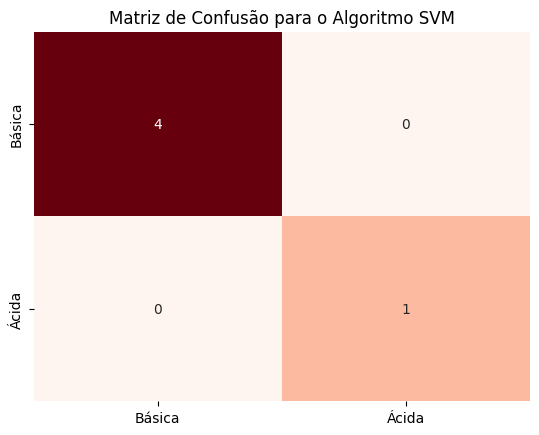

In [11]:
# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=le_classe.classes_, yticklabels=le_classe.classes_)
plt.title('Matriz de Confusão para o Algoritmo SVM')
plt.show()

Visualização dos dados da máquina de forma gráfica

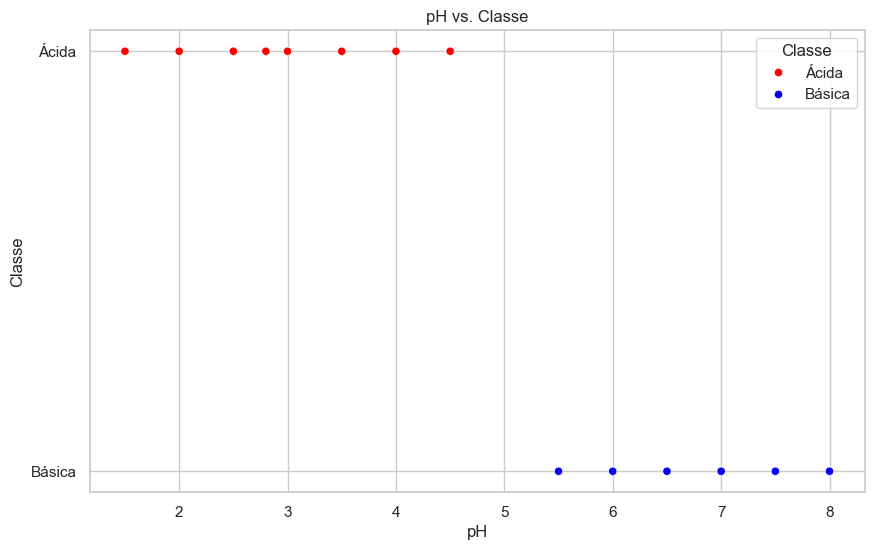

In [14]:
# Criar um mapeamento para a coluna 'Classe' de volta aos valores categóricos originais
data['Classe'] = data['Classe'].map(dict(zip(le_classe.transform(le_classe.classes_), le_classe.classes_)))

# Scatter plot para visualização
sns.set(style="whitegrid")
palette = {"Ácida": "red", "Básica": "blue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='Classe', hue='Classe', data=data, palette=palette)

plt.title('pH vs. Classe')  # Título atualizado
plt.xlabel('pH')
plt.ylabel('Classe')

plt.legend(title='Classe')
plt.show()